In [1]:
import pandas as pd
import numpy as np
# in assignment1, year ID is the season
# stint means teams and it's possible one person served two team in one season

## 1.Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [2]:
data = pd.read_csv('Batting.csv')
data.head()

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


## 2.Print out the dimensions and info about the dataframe you just created

In [3]:
print('The dimensions: {}'.format(data.ndim))

The dimensions: 2


In [4]:
#print('the info: \n{}'.format(data.info))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

In [6]:
data.shape

(102816, 25)

## 3.How many players have hit 40 or more HRs in one single season? (Number only)

In [31]:
a=data.groupby(['playerID','yearID'],as_index=False)['HR'].sum()
hr_40=a[a['HR']>=40]
hr_40['playerID'].nunique()

142

## 4.How many players have hit more than 600 HRs for their career? (Dataframe)

In [52]:
hr_4=data.groupby('playerID',as_index=False)['HR'].sum()
hr_600=hr_4[hr_4['HR']>600]
hr_600=hr_600.reset_index().reset_index()
hr_600.columns=['count','index','playerID','HR']
hr_600['count']=hr_600['count']+1
hr_600

,count,index,playerID,HR
0,1,1,aaronha01,755
1,2,1542,bondsba01,762
2,3,6633,griffke02,630
3,4,10857,mayswi01,660
4,5,14528,rodrial01,696
5,6,14865,ruthba01,714
6,7,16103,sosasa01,609
7,8,17004,thomeji01,612



## 5.How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only)

In [39]:
c=data.groupby(['playerID','yearID'],as_index=False)[['2B','3B','H','HR']].sum()
c=c[(c['2B']==40) | (c['3B']==10) | (c['H']==200) | (c['HR']==30)]
# c=c[(c['2B']==40) & (c['3B']==10) & (c['H']==200) & (c['HR']==30)]# NOTHING 
c['playerID'].nunique()

705

## 6. How many players have had 100 or more SBs in a season? (Dataframe)

In [49]:
sb_6=data.groupby(['playerID','yearID'],as_index=False)['SB'].sum()
sb_6_100=sb_6[sb_6['SB']>=100]
sb_6_100=sb_6_100.reset_index().reset_index()
sb_6_100.columns=['count','index','playerID','yearID','SB']
sb_6_100['count']=sb_6_100['count']+1
sb_6_100

,count,index,playerID,yearID,SB
0,1,9713,brocklo01,1974,118.0
1,2,10331,brownpe01,1887,103.0
2,3,10364,brownto01,1891,106.0
3,4,16351,colemvi01,1985,110.0
4,5,16352,colemvi01,1986,107.0
5,6,16353,colemvi01,1987,109.0
6,7,16703,comisch01,1887,117.0
7,8,27187,fogarji01,1887,102.0
8,9,34649,hamilbi01,1889,111.0
9,10,34650,hamilbi01,1890,102.0


## 7. How many players in the 1960s have hit more than 200 HRs? (DataFrame)

In [57]:
hr_7=data.groupby(['playerID','yearID'],as_index=False)['HR'].sum()
# hr_7=pd.DataFrame(hr_7).reset_index()
hr_7_1960s=hr_7[(hr_7['yearID']>=1960) & (hr_7['yearID']<=1969)]
hr_7_1960s=hr_7_1960s.groupby(['playerID'])['HR'].sum()
hr_7_200=pd.DataFrame(hr_7_1960s[hr_7_1960s>200])
hr_7_200=hr_7_200.reset_index().reset_index()
hr_7_200.columns=['count','playerID','HR']
hr_7_200['count']=hr_7_200['count']+1
hr_7_200

,count,playerID,HR
0,1,aaronha01,375
1,2,allisbo01,225
2,3,bankser01,269
3,4,cashno01,278
4,5,cepedor01,254
5,6,colavro01,245
6,7,howarfr01,288
7,8,kalinal01,210
8,9,killeha01,393
9,10,mantlmi01,256


## 8. Who has hit the most HRs in history? (DataFrame) 

In [88]:
hr_8=data.groupby(['playerID'])['HR'].sum().sort_values(ascending=False)
hr_8_max=pd.DataFrame(hr_8).head(1)
hr_8_max

,HR
playerID,
bondsba01,762


## 9. Who had the most hits in the 1970s? (DataFrame)

In [61]:
h_9=data.groupby(['playerID','yearID'],as_index=False)['H'].sum()
h_9_1970s=h_9[(h_9['yearID']>=1970) & (h_9['yearID']<=1979)]
h_9_1970s=pd.DataFrame(h_9_1970s.groupby(['playerID'])['H'].sum()).reset_index()
pd.DataFrame(h_9_1970s.max(),columns=['most hits'])

,most hits
playerID,ziskri01
H,2045


## 10. Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977? (DataFrame)

In [40]:
# game data in 1977
season_1977=data[data['yearID']==1977]
season_1977=season_1977.groupby(['playerID','nameFirst','nameLast','birthYear','yearID'],as_index=False)['H','BB','IBB','SH','SF','AB'].sum()
#calculate OBP and PA
season_1977['OBP']=(season_1977['H']+season_1977['BB']+season_1977['IBB']+season_1977['SH']+season_1977['SF'])/season_1977['AB']
season_1977['PA']=season_1977['AB']+season_1977['BB']+season_1977['IBB']+season_1977['SH']+season_1977['SF']
# PA more than or equal to 500
season_1977_PA=season_1977[season_1977['PA']>=500]
# Top 5 highest OBP
season_1977_PA.sort_values(by='OBP',ascending=False).head(5)[['playerID','nameFirst','nameLast','birthYear','yearID','OBP','PA']]

,playerID,nameFirst,nameLast,birthYear,yearID,OBP,PA
745,singlke01,Ken,Singleton,1947,1977,0.563433,662.0
752,smithre06,Reggie,Smith,1945,1977,0.559426,611.0
800,tenacge01,Gene,Tenace,1946,1977,0.556064,578.0
334,hargrmi01,Mike,Hargrove,1949,1977,0.540952,649.0
135,carewro01,Rod,Carew,1945,1977,0.534091,706.0


## 11. Top 8 highest averages in 2013 with at least 300 PAs? (DataFrame)

In [48]:
# game data in 2013
season_2013=data[data['yearID']==2013]
season_2013=season_2013.groupby(['playerID','nameFirst','nameLast','birthYear','yearID'],as_index=False)['H','BB','IBB','SH','SF','AB'].sum()
# calculate PA
season_2013['PA']=season_2013['AB']+season_2013['BB']+season_2013['IBB']+season_2013['SH']+season_2013['SF']
# PA equals to or lage than 300
PA_300=season_2013[season_2013['PA']>=300]
# Get average values
PA_300['AVERAGES']=PA_300['H']/PA_300['AB']
PA_300.sort_values(by='AVERAGES',ascending=False).head(8)[['playerID','nameFirst','nameLast','birthYear','yearID','AB','PA','AVERAGES']]

/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,playerID,nameFirst,nameLast,birthYear,yearID,AB,PA,AVERAGES
167,cabremi01,Miguel,Cabrera,1983,2013,555,666.0,0.347748
980,ramirha01,Hanley,Ramirez,1983,2013,304,336.0,0.345395
269,cuddymi01,Michael,Cuddyer,1979,2013,489,543.0,0.331288
759,mauerjo01,Joe,Mauer,1983,2013,445,515.0,0.323596
1196,troutmi01,Mike,Trout,1991,2013,589,717.0,0.322581
595,johnsch05,Chris,Johnson,1984,2013,514,550.0,0.321012
398,freemfr01,Freddie,Freeman,1989,2013,551,632.0,0.319419
962,puigya01,Yasiel,Puig,1990,2013,382,427.0,0.319372


## 12. Leaders in hits from 1940 up to and including 1949. (DataFrame) (top 10 sorted by hits)

In [206]:
data_1940s=data[(data['yearID']>=1940) & (data['yearID']<=1949)]
hits_1940s=pd.DataFrame(data_1940s.groupby(['playerID','yearID'])['H'].sum()).reset_index()
hits_1940s.nlargest(10,'H')

,playerID,yearID,H
3512,musiast01,1948,230
3510,musiast01,1946,228
2189,holmeto01,1945,224
3508,musiast01,1943,220
4835,travice01,1941,218
3809,peskyjo01,1946,208
1119,dillibo01,1948,207
3513,musiast01,1949,207
3810,peskyjo01,1947,207
4970,vernomi01,1946,207


## 13. Who led MLB with the most hits the most times? And how many times? (DataFrame, Number)

In [134]:
# retrieve MLB organization's teams
MLB=data[data['teamID'].map(lambda x:x[:2])=='ML']
# get hits value for each players in each seasons
season_hit=pd.DataFrame(MLB.groupby(['yearID','playerID'])['H'].sum())
# person who got most hits in different years' games
max_hits=pd.DataFrame(season_hit.groupby(level=0).idxmax())
max_hits['yearID']=max_hits['H'].map(lambda x:x[0])
max_hits['playerID']=max_hits['H'].map(lambda x:x[1])
max_hits.drop('H', axis=1, inplace=True)
player_hits_max=pd.merge(max_hits,season_hit.reset_index(),how='inner')
## player_hits_max
player_max_time=pd.DataFrame(player_hits_max['playerID'].value_counts()).reset_index()
player_max_time.columns=['playerID','max_times']
## player_max_time
player_hits_max=pd.merge(player_hits_max,player_max_time)
player_hits_max[player_hits_max['max_times']==player_hits_max['max_times'].max()]
# player_hits_max.sort_values(by='times',ascending=False).reset_index().drop('index',axis=1,inplace=True)
# mostHits_mostTime=pd.DataFrame(player_hits_max.loc[0])
# mostHits_mostTime.columns=['player']
# mostHits_mostTime

,yearID,playerID,H,max_times
7,1955,aaronha01,189,9
8,1956,aaronha01,200,9
9,1957,aaronha01,198,9
10,1958,aaronha01,196,9
11,1959,aaronha01,223,9
12,1961,aaronha01,197,9
13,1962,aaronha01,191,9
14,1963,aaronha01,201,9
15,1965,aaronha01,181,9


In [137]:
print('Time of the most hits is: ',player_hits_max['max_times'].max())

Time of the most hits is:  9


## 14. Which players have played the most games for their careers? 
##        Top 5, descending by games played presented as a dataframe

In [21]:
# game=pd.DataFrame(data.groupby(['playerID'])['G'].value_counts())
# game.columns=['count_game']
# game

In [20]:
game2=pd.DataFrame(data.groupby(['playerID'])['G'].count())
game2.columns=['count_game']
game2.sort_values(by='count_game',ascending=False,inplace=True)
game2.head(5)

,count_game
playerID,
mcguide01,31
henderi01,29
newsobo01,29
johnto01,28
kaatji01,28


## 15. How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs ? Just a number is okay here.

In [38]:
# more than 3000 hits
hits_15=pd.DataFrame(data.groupby(['playerID'])['H'].sum()).reset_index()
hits_15_3000=hits_15[hits_15['H']>3000]
# hits_15_3000
# hitting 500 or more HRs
hr_15=pd.DataFrame(data.groupby(['playerID'])['HR'].sum()).reset_index()
hr_15_500=hr_15[hr_15['HR']>=500]
# hr_15_500
# merge two dataframes
hits_hr=pd.merge(hits_15_3000,hr_15_500,how='inner',on='playerID')
hits_hr['playerID'].count()

5

## 16. How many HRs were hit during the entire 1988 season? Just a number is okay here.

In [47]:
# yearID is the season
data_1988=data[data['yearID']==1988]
# data_1988['HR'].sum()
print('the total HRs were hit in 1988 season is: ', data_1988['HR'].sum())

the total HRs were hit in 1988 season is:  3180


## 17. Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs.  I would like a dataframe sorted by average.

In [65]:
Wade_Boggs=data[(data['nameFirst']=='Wade') & (data['nameLast']=='Boggs')]
Wade_Boggs['name']=Wade_Boggs['nameFirst']+[' ']+Wade_Boggs['nameLast']
Wade_Boggs=Wade_Boggs.groupby(['playerID','name','yearID'],as_index=False)['H','AB'].sum()
Wade_Boggs['AVERAGE']=Wade_Boggs['H']/Wade_Boggs['AB']
Wade_Boggs=Wade_Boggs[Wade_Boggs['AB']>=500]
Wade_Boggs.sort_values(by='AVERAGE',ascending=False).head(3)

/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,playerID,name,yearID,H,AB,AVERAGE
3,boggswa01,Wade Boggs,1985,240,653,0.367534
6,boggswa01,Wade Boggs,1988,214,584,0.366438
5,boggswa01,Wade Boggs,1987,200,551,0.362976


## 18. Please filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP.  I would like a dataframe for this

In [16]:
data_1995=data[data['yearID']==1995]
data_1995['PA']=data_1995['AB']+data_1995['BB']+data_1995['IBB']+data_1995['SH']+data_1995['SF']
data_1995['OBP']=(data_1995['H']+data_1995['BB']+data_1995['IBB']+data_1995['SH']+data_1995['SF'])/data_1995['AB']
data_1995_400pa=data_1995[data_1995['PA']>=400]
data_1995_400pa=data_1995_400pa.sort_values(by='OBP',ascending=False)
data_1995_400pa[['playerID','nameFirst','nameLast','birthYear','yearID','stint','teamID','lgID','PA','OBP']]

/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,PA,OBP
73996,thomafr04,Frank,Thomas,1968,1995,1,CHA,AL,670.0,0.667343
73578,martied01,Edgar,Martinez,1963,1995,1,SEA,AL,650.0,0.628180
73611,mcgwima01,Mark,McGwire,1963,1995,1,OAK,AL,416.0,0.586751
73002,bondsba01,Barry,Bonds,1964,1995,1,SFN,NL,652.0,0.583004
73145,davisch01,Chili,Davis,1960,1995,1,CAL,AL,534.0,0.577830
73560,magadda01,Dave,Magadan,1962,1995,1,HOU,NL,431.0,0.551724
73999,thomeji01,Jim,Thome,1970,1995,1,CLE,AL,555.0,0.542035
72937,baineha01,Harold,Baines,1959,1995,1,BAL,AL,472.0,0.524675
74080,weisswa01,Walt,Weiss,1963,1995,1,COL,NL,540.0,0.524590
72999,boggswa01,Wade,Boggs,1958,1995,1,NYA,AL,546.0,0.510870


In [17]:
# the top OBPs for the 1995 season with at least 400 PAs
data_1995_400pa.head(1)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP
73996,thomafr04,Frank,Thomas,1968,1995,1,CHA,AL,145,493,...,2.0,136,74.0,29.0,6.0,0.0,12.0,14.0,670.0,0.667343


## 19. Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with just the leader

In [41]:
# 1922
data_1922=data[data['yearID']==1922]
data_1922_3B=pd.DataFrame(data_1922.groupby(['yearID','playerID','nameFirst','nameLast','birthYear'])['3B'].sum())
data_1922_3B_max=data_1922_3B.sort_values(by='3B',ascending=False).head(1)

# 1925
data_1925=data[data['yearID']==1925]
data_1925_3B=pd.DataFrame(data_1925.groupby(['yearID','playerID','nameFirst','nameLast','birthYear'])['3B'].sum())
data_1925_3B_max=data_1925_3B.sort_values(by='3B',ascending=False).head(1)

# 1926
data_1926=data[data['yearID']==1926]
data_1926_3B=pd.DataFrame(data_1926.groupby(['yearID','playerID','nameFirst','nameLast','birthYear'])['3B'].sum())
data_1926_3B_max=data_1926_3B.sort_values(by='3B',ascending=False).head(1)

# 1928
data_1928=data[data['yearID']==1928]
data_1928_3B=pd.DataFrame(data_1928.groupby(['yearID','playerID','nameFirst','nameLast','birthYear'])['3B'].sum())
data_1928_3B_max=data_1928_3B.sort_values(by='3B',ascending=False).head(1)

# concatenate four dataframe together
pd.concat([data_1922_3B_max,data_1925_3B_max,data_1926_3B_max,data_1928_3B_max],axis=0)

,,,,,3B
yearID,playerID,nameFirst,nameLast,birthYear,
1922,daubeja01,Jake,Daubert,1884,22
1925,cuyleki01,Kiki,Cuyler,1898,26
1926,wanerpa01,Paul,Waner,1903,22
1928,combsea01,Earle,Combs,1899,21


## 20. How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [18]:
hr_sb=data.groupby(['playerID','nameFirst','nameLast','birthYear','yearID'], as_index=False)['HR','SB'].sum()
hr_sb_30=hr_sb[(hr_sb['HR']>=30) & (hr_sb['SB']>=30)]
hr_sb_30['playerID'].nunique()

38

## 21. Who had the highest OBP is 1986 with at least 400 PAs? (Dataframe)

In [28]:
data_1986=data[data['yearID']==1986]
data_1986['PA']=data_1986['AB']+data_1986['BB']+data_1986['IBB']+data_1986['SH']+data_1986['SF']
data_1986['OBP']=(data_1986['H']+data_1986['BB']+data_1986['IBB']+data_1986['SH']+data_1986['SF'])/data_1986['AB']
data_1986_pa400=data_1986[data_1986['PA']>=400]
data_1986_pa400.sort_values(by='OBP',ascending=False).head(1)

/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP
63320,boggswa01,Wade,Boggs,1958,1986,1,BOS,AL,149,580,...,4.0,105,44.0,14.0,0.0,4.0,4.0,11.0,707.0,0.575862


## 22. Same question but for 1997 and only in the NL (check league ID)? (Dataframe)

In [35]:
data_1997nl=data[(data['yearID']==1986) & (data['lgID']=='NL')]
data_1997nl['PA']=data_1997nl['AB']+data_1997nl['BB']+data_1997nl['IBB']+data_1997nl['SH']+data_1997nl['SF']
data_1997nl['OBP']=(data_1997nl['H']+data_1997nl['BB']+data_1997nl['IBB']+data_1997nl['SH']+data_1997nl['SF'])/data_1997nl['AB']
data_1997nl_pa400=data_1997nl[data_1997nl['PA']>=400]
data_1997nl_pa400.sort_values(by='OBP',ascending=False).head(1)

/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP
64051,schmimi01,Mike,Schmidt,1949,1986,1,PHI,NL,160,552,...,2.0,89,84.0,25.0,7.0,0.0,9.0,8.0,675.0,0.512681


## 23. Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe)

In [22]:
# retrieve 2012 data
data_2012=data[data['yearID']==2012]

# calculate PAs
data_2012['PA']=data_2012['AB']+data_2012['BB']+data_2012['IBB']+data_2012['SH']+data_2012['SF']
data_2012_2=data_2012.groupby(['playerID','nameFirst','nameLast','birthYear','yearID','lgID'],as_index=False)['PA','HR'].sum()
# filter out players who had less than 500 PA
data_2012_2=data_2012_2[data_2012_2['PA']>=500]
data_2012_2
# calculate average HR for each leagues 
league_hr_mean=data_2012.groupby(['lgID'],as_index=False)['HR'].mean()
league_hr_mean.columns=['lgID','HR_MEAN']

# merge the two dataframes
data_2012_hr=pd.merge(league_hr_mean,data_2012_2,how='inner',on='lgID')
data_2012_hr[data_2012_hr['HR']>data_2012_hr['HR_MEAN']]


/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,lgID,HR_MEAN,playerID,nameFirst,nameLast,birthYear,yearID,PA,HR
0,AL,3.822630,ackledu01,Dustin,Ackley,1988,2012,675.0,12
2,AL,3.822630,avilemi01,Mike,Aviles,1981,2012,544.0,13
3,AL,3.822630,aybarer01,Erick,Aybar,1984,2012,549.0,8
4,AL,3.822630,beckhgo01,Gordon,Beckham,1986,2012,575.0,16
5,AL,3.822630,beltrad01,Adrian,Beltre,1979,2012,657.0,36
6,AL,3.822630,brantmi02,Michael,Brantley,1987,2012,621.0,6
7,AL,3.822630,butlebi03,Billy,Butler,1986,2012,681.0,29
8,AL,3.822630,cabreas01,Asdrubal,Cabrera,1985,2012,613.0,16
9,AL,3.822630,cabremi01,Miguel,Cabrera,1983,2012,711.0,44
10,AL,3.822630,callaal01,Alberto,Callaspo,1983,2012,521.0,10


## 24. Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)

In [82]:
data_hr=data.groupby(['playerID','nameFirst','nameLast','birthYear','yearID'],as_index=False)['HR'].sum()
data_hr['AGE']=data_hr['yearID']-data_hr['birthYear']
data_50hr=data_hr[data_hr['HR']>=50]
data_50hr.sort_values(by='AGE').head(1)

,playerID,nameFirst,nameLast,birthYear,yearID,HR,AGE
26282,fieldpr01,Prince,Fielder,1984,2007,50,23


## 25. Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe)

In [127]:
data_25=data.copy()
# calculate the ages of each players in corresponding games
data_25['age']=data_25['yearID']-data_25['birthYear']
# HR of certain player hit in certain years
hr_25=pd.DataFrame(data_25.groupby(['playerID','nameFirst','nameLast','age','birthYear','yearID'],as_index=False)['HR'].sum())
# calculate the cumulative HR for each players
hr_25['hr_cumulative'] = hr_25.groupby(['playerID','nameFirst','nameLast'])['HR'].apply(lambda x: x.cumsum())

In [128]:
# retrieve players who has cumulative HRs are more than or equal to 300
hr_25_300=hr_25[hr_25['hr_cumulative']>=300]
hr_25_300.sort_values(by='age').head(5)

,playerID,nameFirst,nameLast,age,birthYear,yearID,HR,hr_cumulative
43074,jonesan01,Andruw,Jones,28,1977,2005,51,301
69369,pujolal01,Albert,Pujols,28,1980,2008,37,319
64767,ottme01,Mel,Ott,28,1909,1937,31,306
73216,rodrial01,Alex,Rodriguez,28,1975,2003,47,345
27852,foxxji01,Jimmie,Foxx,28,1907,1935,36,302


## BONUS:  Graph total HRs per season using bar graph

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
season_HR=data.groupby(['yearID'],as_index=False)['HR'].sum()
# data_totalHR

Text(0.5,1,'HRs per Season')

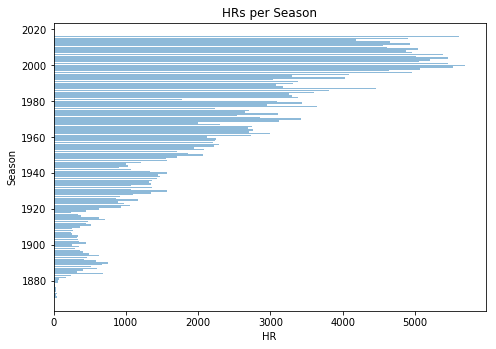

In [13]:
fig=plt.figure()
axes=fig.add_axes([1,1,1,1])
axes.barh(season_HR['yearID'],season_HR['HR'],alpha=0.5)
axes.set_xlabel('HR')
axes.set_ylabel('Season')
axes.set_title('HRs per Season')

## BONUS: Using a line graph please graph the average HRs per AB (think about this) per season

In [24]:
data_graph2=data.copy()
data_graph2=data_graph2.groupby(['yearID'],as_index=False)[['AB','HR']].sum()
data_graph2['HR_per_AB']=data_graph2['HR']/data_graph2['AB']

Text(0,0.5,'Average HRs per AB')

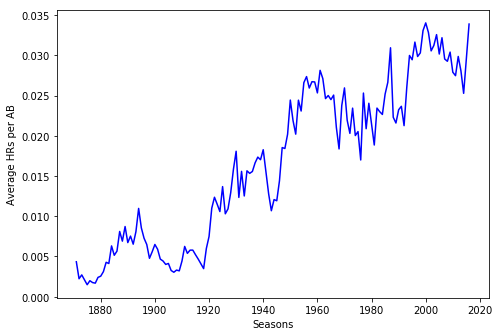

In [25]:
fig2=plt.figure()
axes2=fig2.add_axes([1,1,1,1])
axes2.plot(data_graph2['yearID'],data_graph2['HR_per_AB'], 'b')
axes2.set_xlabel('Seasons') 
axes2.set_ylabel('Average HRs per AB')